#1. Configuración del Ambiente



Para desarrollar este desafío te recomendamos trabajar directamente desde la plataforma **Google Colab**. (Recuerda que debes tener una cuenta en gmail, si aún no la tienes, debes crearla).

*   Accede a la siguiente URL: [Google Colaboratory](https://colab.research.google.com/)
*   Debes crear un nuevo Notebook, y asignarle el nombre que desees: Ej. La esencia del cliente 1
*   Tras seguir los pasos anteriores, debes conectar tu notebook con tu cuenta de **Google Drive**. Para ello, en una nueva celda de código digita y ejecuta:
```
from google.colab import drive
drive.mount('/content/drive')
```
*   Accede a las siguientes URLs para descargar el dataset que estaremos utilizando: Cost [Prediction on acquiring Customers.](https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart)
*   Después de descargar el dataset, crea un directorio en tu cuenta de Drive y haz el upload de este.
*   Ya estás listo para avanzar a la siguiente etapa. ¡Te deseo muchos Éxitos!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Obtención de los datos

1. Para que puedas cargar en tu notebook los archivos que almacenaste previamente en tu cuenta de Drive, debes utilizar la biblioteca [pandas](https://pandas.pydata.org/docs/user_guide/index.html).

2. Como el dataset original está en inglés, lo vas a dejar todo en español para que puedas tener una mejor comprensión del mismo. La idea no es que inviertas tu tiempo en la traducción del dataset y, por este motivo, aquí te voy a dejar un link con un archivo de python que contiene los diccionarios:

  [Diccionarios](https://caelum-online-public.s3.amazonaws.com/challenge-esencia-del-cliente/diccionarios.py)

3. Tu dataset para el análisis lo debes exportar en formato `.csv` y almacenarlo en tu directorio de Drive, pues será necesario para la segunda parte del desafío.

¡Ahora sí puedes avanzar a la siguiente fase! :)


In [ ]:
import pandas as pd

media_prediction = pd.read_csv("/content/drive/MyDrive/BootCamp/CHALLENGE/Spring_3/media prediction and its cost.csv");

media_prediction.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
print(list(media_prediction.columns))

['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost']


In [ ]:
import drive.MyDrive.BootCamp.CHALLENGE.Spring_3.diccionarios as diccionarios

df = media_prediction.copy()

# Obtener el diccionario de mapeo de columnas
column_mappings = diccionarios.columnas

# Mapeo de la columna media_prediction
df['food_category'] = df['food_category'].map(diccionarios.categoria_alimento);
df['food_department'] = df['food_department'].map(diccionarios.departamento);
df['food_family'] = df['food_family'].map(diccionarios.tipo);
df['promotion_name'] = df['promotion_name'].map(diccionarios.promocion);
df['education'] = df['education'].map(diccionarios.escolaridad);
df['member_card'] = df['member_card'].map(diccionarios.miembro);
df['occupation'] = df['occupation'].map(diccionarios.ocupacion);
df['sales_country'] = df['sales_country'].map(diccionarios.pais);
df['marital_status'] = df['marital_status'].map(diccionarios.estado_civil);
df['gender'] = df['gender'].map(diccionarios.genero);
df['avg. yearly_income'] = df['avg. yearly_income'].map(diccionarios.ingreso_anual);
df['houseowner'] = df['houseowner'].map(diccionarios.vivienda_propia);
df['store_type'] = df['store_type'].map(diccionarios.comercio);
df['media_type'] = df['media_type'].map(diccionarios.divulgacion);

df = df.rename(columns=column_mappings)

pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
7514,Dulces,Snacks,Comida,8.40,3.1080,4.0,Rebajadores de precios,Estados Unidos,Casado,Masculino,1.0,Primaria,NaN,Técnico,Sí,1.0,20000,1.0,1.0,Musial,2.10,19.7,16.7,1.0,0.0,33.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico dominical, radio, televisión",54.11
55638,Productos de cocina,Artículos para el hogar,No comestible,5.70,1.8810,3.0,Días de dólar,Estados Unidos,Casado,Femenino,5.0,Secundaria,Bronce,Técnico,Sí,3.0,40000,1.0,3.0,Sunset,1.90,17.4,15.3,1.0,0.0,19.0,Supermercado de lujo,Tacoma,WA,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,"Periódico diario, radio",138.81
17745,Alimentos para picar,Alimentos para picar,Comida,6.20,2.6040,4.0,Venta Doble,Estados Unidos,Casado,Masculino,4.0,Secundaria,Oro,Obrero,No,4.0,40000,4.0,4.0,Fort West,1.55,18.0,17.0,0.0,0.0,15.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
50526,Anchoas enlatadas,Alimentos enlatados,Comida,11.40,5.3580,4.0,Duplica tus ahorros,Canadá,Soltero,Masculino,2.0,Superior,Bronce,Profesional,Sí,2.0,100000,0.0,2.0,Just Right,2.85,10.1,7.1,1.0,1.0,9.0,Supermercado mediano,Victoria,BC,34452.0,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Panfletos,114.72
11976,Alimentos ricos en almidón,Alimentos ricos en almidón,Comida,10.92,3.6036,4.0,Venta de dos días,Estados Unidos,Soltero,Masculino,1.0,Secundaria,NaN,Profesional,Sí,2.0,140000,0.0,2.0,Discover,2.73,14.5,13.5,1.0,0.0,27.0,Supermercado,Seattle,WA,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,Radio,91.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        46561 non-null 

#3. Exploración de los datos

La exploración visual de datos permite a los científicos de datos examinar y explorar grandes volúmenes de datos de manera intuitiva y eficiente. Al representar los datos visualmente, se pueden identificar características importantes, como valores atípicos, distribuciones, correlaciones y agrupaciones, que podrían no ser evidentes al examinar solo los números o las tablas de datos.

Se trata de una herramienta poderosa para comprender, analizar y comunicar información clave presente en los conjuntos de datos, brindando una comprensión más profunda y facilitando la toma de decisiones informadas.

1. Haciendo uso de [Matplotlib](https://matplotlib.org/) y [Seaborn](https://seaborn.pydata.org/) vamos a generar diversos gráficos para entender mejor nuestros datos.

2. Ejemplo: A través de un histograma, podrás observar la distribución de ingresos anuales de los clientes, por ejemplo. (Siéntete libre de escoger las variables que desees visualizar, y genera varios gráficos, según lo consideres pertinente)

3. Es importante que escribas todas tus observaciones e hipótesis en la medida que generes los gráficos. Puedes utilizar una celda de texto de tu notebook para hacerlo.

Tip: Voy a dejar a continuación algunas variables que pueden ser de interés para tenerlas en cuenta en tu análisis visual: Escolaridad, Ocupación, Miembro, Género, Estado Civil, Número de Hijos, Ingresos_anuales, Categoría de alimentos, Tipo, entre otras.


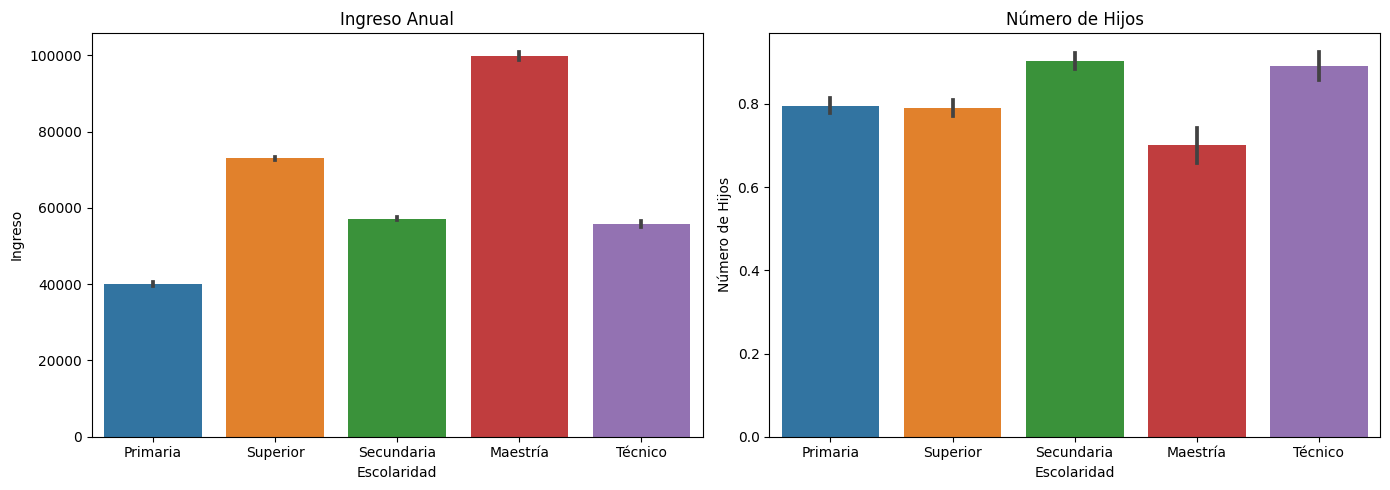

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico izquierdo
sns.barplot(x='escolaridad', y='ingreso_anual', data=df, ax=ax1)
ax1.set_title("Ingreso Anual", fontsize=12)
ax1.set_xlabel("Escolaridad", fontsize=10)
ax1.set_ylabel("Ingreso", fontsize=10)

# Gráfico derecho
sns.barplot(x='escolaridad', y='numero_hijos', data=df, ax=ax2)
ax2.set_title("Número de Hijos", fontsize=12)
ax2.set_xlabel("Escolaridad", fontsize=10)
ax2.set_ylabel("Número de Hijos", fontsize=10)

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

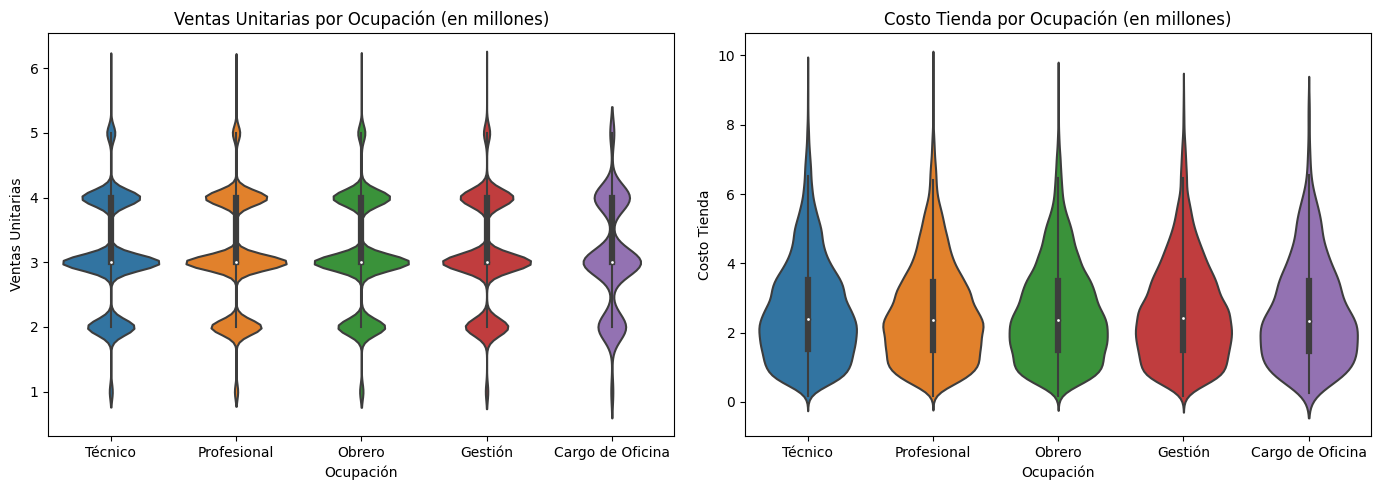

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico izquierdo
sns.violinplot(x='ocupacion', y='ventas_unitarias(en millones)', data=df, ax=ax1)
ax1.set_title("Ventas Unitarias por Ocupación (en millones)", fontsize=12)
ax1.set_xlabel("Ocupación", fontsize=10)
ax1.set_ylabel("Ventas Unitarias", fontsize=10)

# Gráfico derecho
sns.violinplot(x='ocupacion', y='costo_tienda(en millones)', data=df, ax=ax2)
ax2.set_title("Costo Tienda por Ocupación (en millones)", fontsize=12)
ax2.set_xlabel("Ocupación", fontsize=10)
ax2.set_ylabel("Costo Tienda", fontsize=10)

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

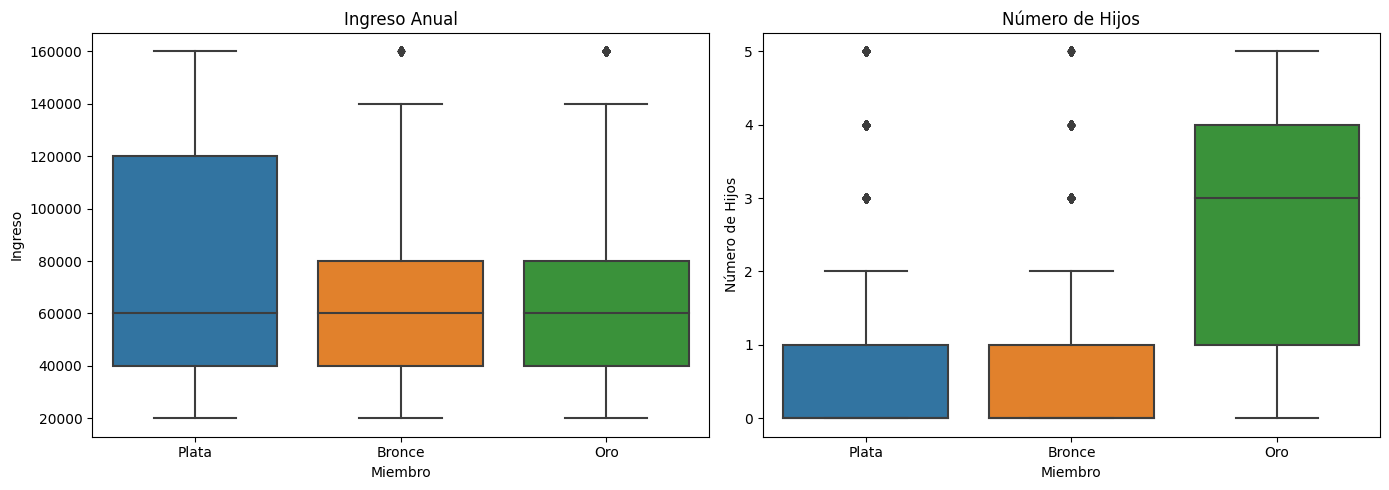

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico izquierdo
sns.boxplot(x='miembro', y='ingreso_anual', data=df, ax=ax1)
ax1.set_title('Ingreso Anual', fontsize=12)
ax1.set_xlabel('Miembro', fontsize=10)
ax1.set_ylabel('Ingreso', fontsize=10)

# Gráfico derecho
sns.boxplot(x='miembro', y='numero_hijos', data=df, ax=ax2)
ax2.set_title('Número de Hijos', fontsize=12)
ax2.set_xlabel('Miembro', fontsize=10)
ax2.set_ylabel('Número de Hijos', fontsize=10)

plt.tight_layout()
plt.show()

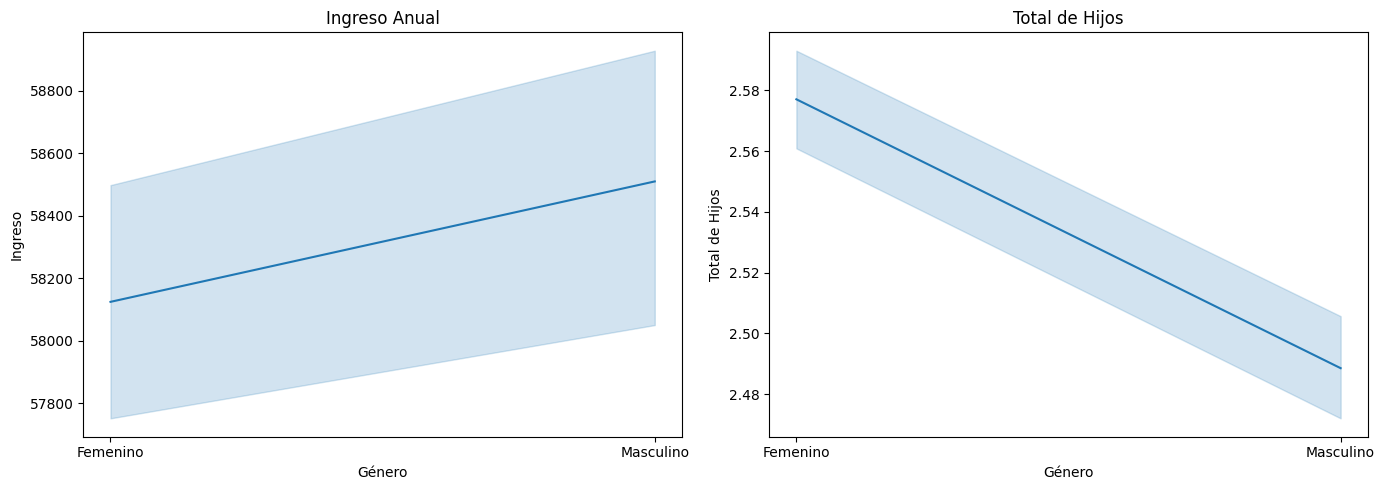

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico izquierdo
sns.lineplot(x='genero', y='ingreso_anual', data=df, ax=ax1)
ax1.set_title('Ingreso Anual', fontsize=12)
ax1.set_xlabel('Género', fontsize=10)
ax1.set_ylabel('Ingreso', fontsize=10)

# Gráfico derecho
sns.lineplot(x='genero', y='total_de_hijos', data=df, ax=ax2)
ax2.set_title('Total de Hijos', fontsize=12)
ax2.set_xlabel('Género', fontsize=10)
ax2.set_ylabel('Total de Hijos', fontsize=10)

plt.tight_layout()
plt.show()

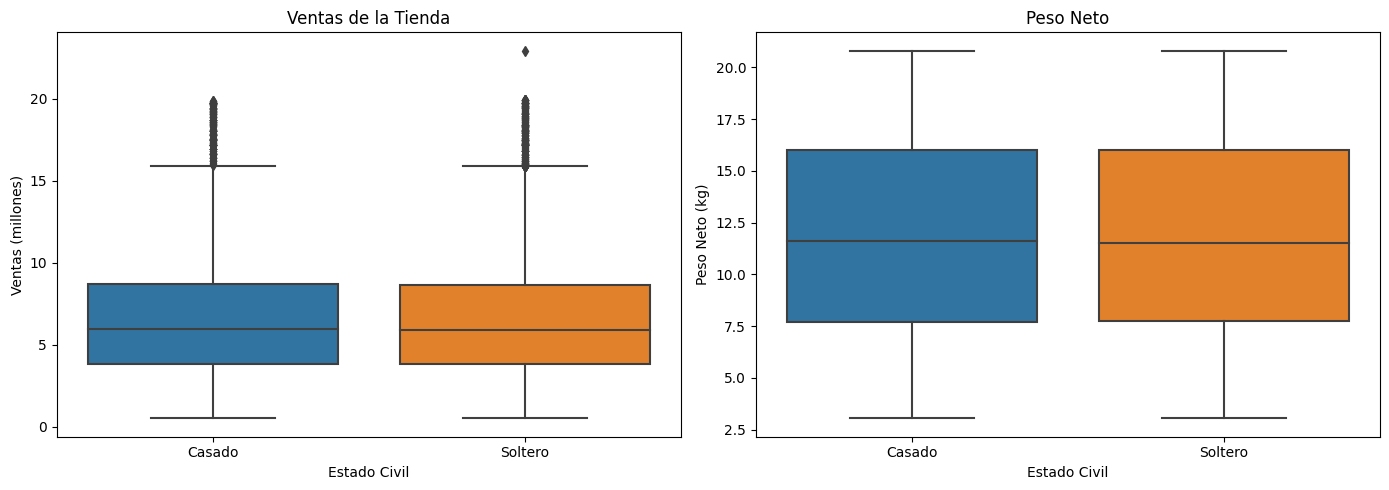

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico izquierdo
sns.boxplot(x='estado_civil', y='ventas_tienda(en millones)', data=df, ax=ax1)
ax1.set_title('Ventas de la Tienda', fontsize=12)
ax1.set_xlabel('Estado Civil', fontsize=10)
ax1.set_ylabel('Ventas (millones)', fontsize=10)

# Gráfico derecho
sns.boxplot(x='estado_civil', y='peso_neto', data=df, ax=ax2)
ax2.set_title('Peso Neto', fontsize=12)
ax2.set_xlabel('Estado Civil', fontsize=10)
ax2.set_ylabel('Peso Neto (kg)', fontsize=10)

plt.tight_layout()
plt.show()

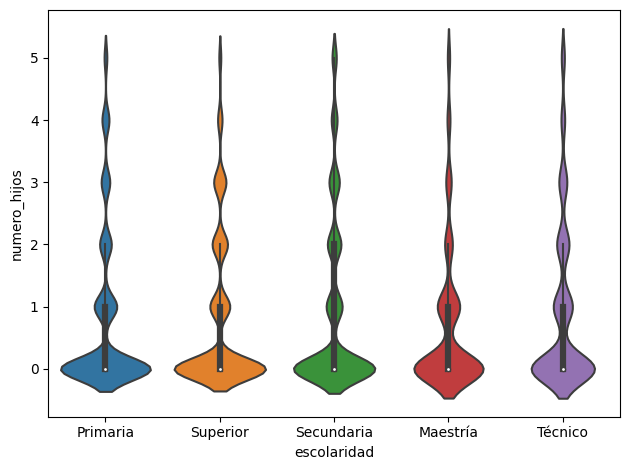

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear figura
fig, ax = plt.subplots()

# Gráfico de violín
sns.violinplot(x='escolaridad', y='numero_hijos', data=df, ax=ax)

plt.tight_layout()
plt.show()

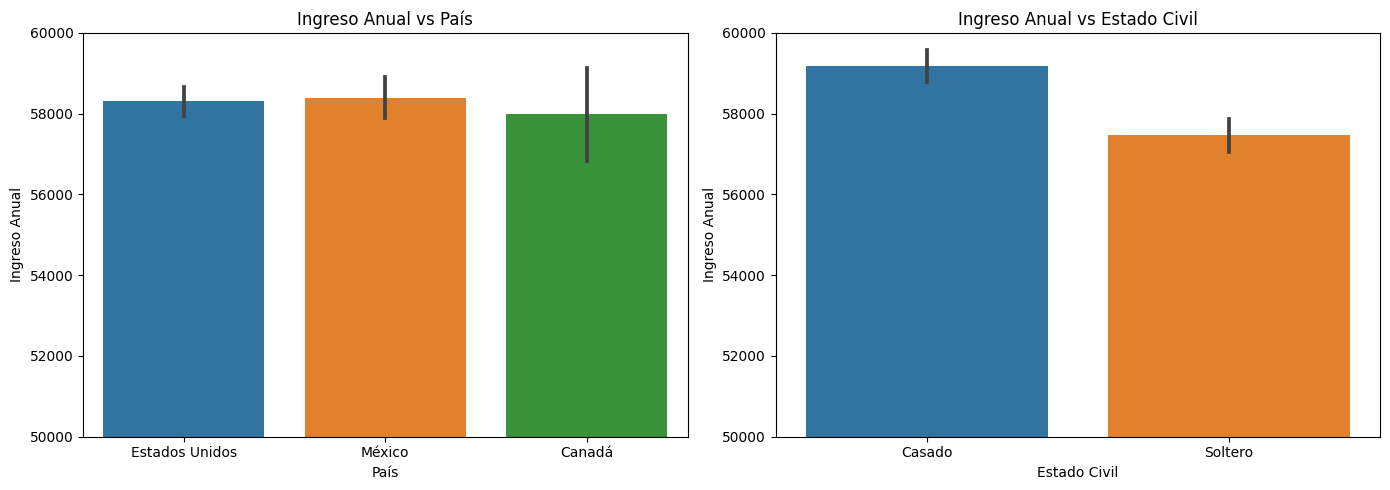

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico izquierdo
sns.barplot(x='pais', y='ingreso_anual', data=df, ax=ax1)
ax1.set_ylim(50000, 60000) # Acotar eje y
ax1.set_title("Ingreso Anual vs País", fontsize=12)
ax1.set_xlabel("País", fontsize=10)
ax1.set_ylabel("Ingreso Anual", fontsize=10)

# Gráfico derecho
sns.barplot(x='estado_civil', y='ingreso_anual', data=df, ax=ax2)
ax2.set_ylim(50000, 60000) # Acotar eje y
ax2.set_title("Ingreso Anual vs Estado Civil", fontsize=12)
ax2.set_xlabel("Estado Civil", fontsize=10)
ax2.set_ylabel("Ingreso Anual", fontsize=10)

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

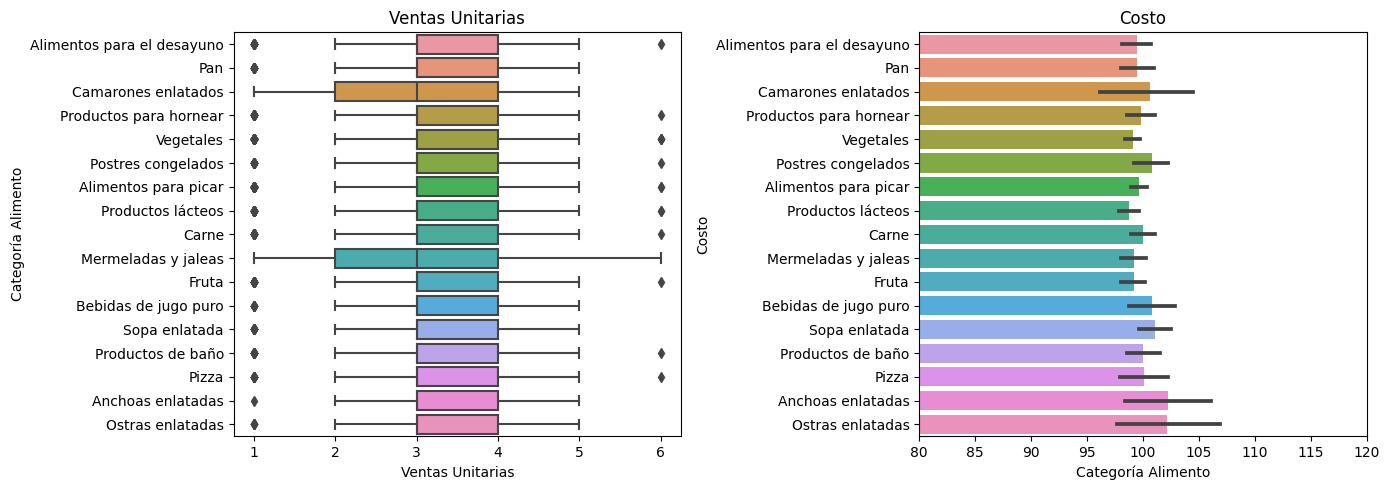

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener top 10 categorías
top10_ventas = df['categoria_alimento'].value_counts().index[:10]
top10_costo = df.groupby('categoria_alimento')['costo'].mean().sort_values(ascending=False).index[:10]

# Filtrar df
df_top10 = df[df['categoria_alimento'].isin(top10_ventas) | df['categoria_alimento'].isin(top10_costo)]

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico izquierdo
sns.boxplot(x='ventas_unitarias(en millones)', y='categoria_alimento', data=df_top10, ax=ax1)
ax1.set_title("Ventas Unitarias", fontsize=12)
ax1.set_ylabel("Categoría Alimento", fontsize=10)
ax1.set_xlabel("Ventas Unitarias", fontsize=10)

# Gráfico derecho - Barras
ax2.set_xlim(80, 120) # Establecer límites de eje x
sns.barplot(x='costo', y='categoria_alimento', data=df_top10, ax=ax2)
ax2.set_title("Costo", fontsize=12)
ax2.set_ylabel("Costo", fontsize=10)
ax2.set_xlabel("Categoría Alimento", fontsize=10)

# Ajustar espaciado
plt.tight_layout()

plt.show()

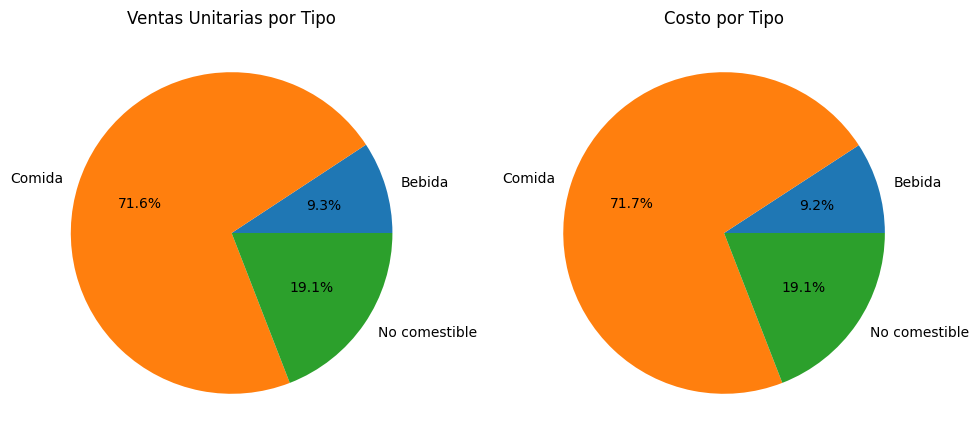

In [ ]:
import matplotlib.pyplot as plt

# Gráficos de torta más pequeños con figsize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Ventas unitarias
ventas_por_tipo = df.groupby('tipo')['ventas_unitarias(en millones)'].sum()
ax1.pie(ventas_por_tipo, labels=ventas_por_tipo.index, autopct='%1.1f%%')
ax1.set_title("Ventas Unitarias por Tipo")

# Costos
costos_por_tipo = df.groupby('tipo')['costo'].sum()
ax2.pie(costos_por_tipo, labels=costos_por_tipo.index, autopct='%1.1f%%')
ax2.set_title("Costo por Tipo")

plt.tight_layout()
plt.show()

#4. Preprocesamiento y Obtención de Features

1. En esta fase es importante utilizar una forma de codificar las variables categóricas para que el modelo de clusterización las pueda reconocer. Puedes usar [one-hot-encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), o establecer un valor numérico para las variables de acuerdo con tu percepción; por ejemplo, si queremos categorizar primaria, secundaria y universidad, podríamos decir que el valor numérico para primaria podría ser 1, el valor numérico para secundaria, 2, y así sucesivamente. (Es importante aclarar que en ejemplo citado, asignamos los valores a cada nivel porque sabemos que primaria es menor que secundaria, y secundaria menor que universidad)

2. Tras establecer un método de codificación para tus variables categóricas, debes reemplazar los valores numéricos asignados en el dataset para sustituir las cadenas de texto.

  Tip: La pregunta que te debes estar haciendo es: ¿Será que tengo que codificar todas las columnas categóricas del dataset? La respuesta es no; únicamente codifica las columnas que tu consideres que puedan ser relevantes para la clusterización.

3. Teniendo en cuenta el paso anterior, debes en efecto seleccionar las variables que sean más relevantes para el caso de estudio: Se desea agrupar a los clientes en diversos clusters para entender sus características y brindarles el mejor servicio.

4. Con tus atributos seleccionados, **al menos 6 y máximo 12**, procederemos a estandarizar nuestros datos (que en este punto deben ser todos numéricos) para que todas las variables puedan ser tenidas en cuenta dentro de una misma escala. Varios de los hiperparámetros utilizados en las funciones de un modelo de Machine Learning asumen que todas las características están centradas alrededor de 0 y tienen varianza en el mismo orden. Si uno de los atributos del dataset tiene una varianza con orden de magnitud muy superior al de los demás atributos, puede dominar la función del modelo y hacer que el estimador no aprenda correctamente de los otros atributos como se espera. Vamos a utilizar con el [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Puedes almacenar los valores estandarizados en una variable llamada `X_std` , por ejemplo.

  ¡Vas a obtener un numpy array listo para avanzar a la próxima fase!

In [ ]:
df.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
49698,Productos de baño,Salud e higiene,No comestible,10.86,3.3666,3.0,Adelante,Estados Unidos,Soltero,Masculino,0.0,Secundaria,Bronce,Técnico,No,3.0,40000,0.0,3.0,Hilltop,3.62,19.30,16.20,0.0,0.0,32.0,Supermercado,Portland,OR,20319.0,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,"Periódico diario, radio",67.01
38768,Alimentos para picar,Alimentos para picar,Comida,2.04,0.6528,4.0,Ahorro para apostadores grandes,Estados Unidos,Casado,Masculino,1.0,Superior,Plata,Profesional,Sí,3.0,60000,1.0,3.0,Fast,0.51,12.30,11.30,1.0,1.0,26.0,Supermercado gourmet,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,"Periódico dominical, radio, televisión",95.55
36419,Carne,Charcutería,Comida,2.98,1.0728,2.0,Descuento de fin de semana,Estados Unidos,Casado,Femenino,2.0,Primaria,NaN,Obrero,Sí,1.0,20000,2.0,1.0,Moms,1.49,11.30,10.30,1.0,0.0,32.0,Supermercado,Los Angeles,CA,23598.0,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Panfletos,53.37
4781,Vegetales,Productos frescos,Comida,7.32,2.9280,4.0,Ahorro de precios,México,Soltero,Masculino,2.0,Secundaria,Bronce,Profesional,Sí,4.0,140000,0.0,4.0,Hermanos,1.83,9.71,8.71,1.0,0.0,6.0,Supermercado,Orizaba,Veracruz,34791.0,26354.0,5062.0,3375.0,0.0,0.0,1.0,1.0,0.0,Televisión,77.72
780,Pan,Productos horneados,Comida,6.54,2.8122,2.0,Venta de dos días,México,Soltero,Masculino,1.0,Técnico,Bronce,Cargo de Oficina,Sí,3.0,40000,0.0,3.0,Colony,3.27,7.71,5.71,0.0,0.0,18.0,Supermercado de lujo,Hidalgo,Zacatecas,30584.0,21938.0,5188.0,3458.0,1.0,1.0,1.0,1.0,1.0,Radio,94.79


In [ ]:
print(df["divulgacion"].unique())

['Periódico diario, radio' 'Cupón en la tienda' 'Radio' 'Periódico diario'
 'Anexo del producto' 'Periódico dominical, radio'
 'Periódico dominical, radio, televisión' 'Periódico dominical'
 'Panfletos' 'Televisión' 'Correo masivo' 'Entrega en el punto de venta'
 'Periódico diario, radio, televisión']


In [ ]:
import pandas as pd
import numpy as np

df_filter = df.copy()

# Mapear valores a números
categoria_alimento_map={'Alimentos para el desayuno':1,'Pan':2,'Camarones enlatados':3,
                        'Productos para hornear':4,'Vegetales':5,'Postres congelados':6,
                        'Dulces':7,'Alimentos para picar':8,'Productos lácteos':9,
                        'Alimentos ricos en almidón':10,'Suministros de limpieza':11,
                        'Descongestionantes':12,'Carne':13,'Bebidas calientes':14,
                        'Mermeladas y jaleas':15,'Bebidas carbonatadas':16,'Mariscos':17,
                        'Especialidades':18,'Productos de cocina':19,'Eléctrico':20,
                        'Cerveza y vino':21,'Velas':22,'Fruta':23,'Bebidas de jugo puro':24,
                        'Sopa enlatada':25,'Productos de papel':26,'Atún enlatado':27,
                        'Huevos':28,'Artículos de ferretería':29,'Sardinas enlatadas':30,
                        'Almejas enlatadas':31,'Analgésicos':32,'Acompañamientos':33,
                        'Productos de baño':34,'Revistas':35,'Platos preparados congelados':36,
                        'Pizza':37,'Remedios para el resfriado':38,'Anchoas enlatadas':39,
                        'Bebidas':40,'Higiene':41,'Productos de plástico':42,
                        'Ostras enlatadas':43,'Vegetales envasados':44,'Misceláneos':45}
departamento_map={'Alimentos congelados':1, 'Productos horneados':2,
                  'Alimentos enlatados':3,'Productos para hornear':4,
                  'Productos frescos':5, 'Snacks':6, 'Alimentos para picar':7,
                  'Productos lácteos':8, 'Alimentos ricos en almidón':9,
                  'Artículos para el hogar':10, 'Salud e higiene':11, 'Carne':12,
                  'Bebidas':13, 'Mariscos':14, 'Charcutería':15, 'Bebidas alcohólicas':16,
                  'Productos enlatados':17, 'Huevos':18, 'Publicaciones periódicas':19,
                  'Alimentos para el desayuno':20, 'Caja de salida':21, 'Carrusel':22}
tipo_map = {'Comida': 1, 'No comestible': 2, 'Bebida': 3}
promocion_map={'Bolsas llenas':1,'Lotería de la caja registradora':2,
               'Ahorro para apostadores grandes':3,'Venta Doble':4,'Días de luz verde':5,
               'Ahorro Enorme':6, 'Ahorro de precios':7,'Rebajadores de precios':8,
               'Días de dólar':9,'Venta de dos días':10,'Super Ahorradores':11,
               'Descuento de fin de semana':12,'Recortadores de dólares':13,
               'Promociones por montones':14,'Gran promoción':15,'Gratis para todos':16,
               'Ahorros por montones':17,'Ahorro de precios imbatible':18,
               'Aplastadores de precios':19,'Días de liquidación de estanterías':20,
               'Días de venta':21, 'Adelante':22,'Super Ahorro':23,'Ahorradores de billetera':24,
               'Venta Ahorra Ya':25,'Destructores de precios':26,'Dos por uno':27,
               'Descuentos de gran magnitud':28,'Estantes vacíos':29,'Adiós bebé':30,
               'Venta de un día':31,'Descuentos fantásticos':32,'Días de ahorro':33,
               'Ganadores de ventas':34,'Espectacular de cupones':35,'Tres por uno':36,
               'Ganadores de precios':37,'Más barato':38,'Venta No Puedo Creerlo':39,
               'Ahorradores de dinero':40,'Especial luz verde':41,'Rebajando precios':42,
               'Ahorro de primera clase':43,'Mejores ahorros':44,'Elige tus ahorros':45,
               'Duplica tus ahorros':46,'Venta misteriosa':47,
               'Super ahorradores de billetera':48}
pais_map ={'Estados Unidos':1, 'México':2, 'Canadá':3}
estado_civil_map={'Casado':1, 'Soltero':2}
genero_map={'Femenino':1, 'Masculino':2}
estado_map={'OR':1, 'WA':2, 'CA':3, 'Veracruz':4, 'Yucatan':5, 'Zacatecas':6, 'DF':7,
            'BC':8, 'Jalisco':9, 'Guerrero':10}
escolaridad_map={'Primaria':1, 'Superior':2, 'Secundaria':3, 'Maestría':4, 'Técnico':5}
miembro_map = {np.nan: 0, 'Plata': 1, 'Bronce': 2, 'Oro': 3}
ocupacion_map={'Técnico':1, 'Profesional':2, 'Obrero':3, 'Gestión':4, 'Cargo de Oficina':5}
vivienda_propia_map={'Sí':1, 'No':0}
marca_map={'Carrington':1,'Golden':2,'Imagine':3,'Big Time':4,'PigTail':5,'Fantastic':6,
           'Great':7,'Sphinx':8,'Modell':9,'Colony':10,'Blue Label':11,'Pleasant':12,
           'Bravo':13,'Better':14,'Just Right':15,'Plato':16,'BBB Best':17,'Landslide':18,
           'Super':19,'CDR':20,'High Top':21,'Tri-State':22,'Hermanos':23,'Tell Tale':24,
           'Ebony':25,'Thresher':26,'Gulf Coast':27,'Musial':28,'Atomic':29,'Choice':30,
           'Fort West':31,'Nationeel':32,'Horatio':33,'Best Choice':34,'Fast':35,'Gorilla':36,
           'Carlson':37,'Even Better':38,'Club':39,'Booker':40,'Shady Lake':41,'Monarch':42,
           'Discover':43,'Colossal':44,'Medalist':45,'Jardon':46,'Cormorant':47,'Sunset':48,
           'Red Wing':49,'High Quality':50,'Denny':51,'Faux Products':52,'Steady':53,
           'Consolidated':54,'Bird Call':55,'Hilltop':56,'Ship Shape':57,'Footnote':58,
           'Genteel':59,'Quick':60,'Gerolli':61,'Excellent':62,'Fabulous':63,'Token':64,
           'Skinner':65,'Washington':66,'Dual City':67,'Kiwi':68,'Tip Top':69,'Amigo':70,
           'Curlew':71,'Moms':72,'Cutting Edge':73,'Red Spade':74,'Lake':75,'American':76,
           'Walrus':77,'Pearl':78,'Good':79,'Top Measure':80,'Portsmouth':81,'Toucan':82,
           'Applause':83,'Swell':84,'Green Ribbon':85,'Big City':86,'National':87,
           'Blue Medal':88,'Urban':89,'Jumbo':90,'Giant':91,'Dollar':92,'Mighty Good':93,
           'Robust':94,'Gauss':95,'Excel':96,'Radius':97,'Best':98,'Jeffers':99,'Johnson':100,
           'Special':101,'Akron':102,'Framton':103,'Black Tie':104,'Queen':105,'James Bay':106,
           'Toretti':107,'Prelude':108,'Symphony':109,'ADJ':110,'King':111}
comercio_map={'Supermercado de lujo':1, 'Supermercado':2, 'Supermercado gourmet':3,
          'Pequeño supermercado':4, 'Supermercado mediano':5}
ciudad_map={'Salem':1,'Tacoma':2,'Seattle':3,'Spokane':4,'Los Angeles':5,'Beverly Hills':6,
            'Portland':7,'Bellingham':8,'Orizaba':9,'Merida':10,'Hidalgo':11,'Mexico City':12,
            'Vancouver':13,'Bremerton':14,'Camacho':15,'Guadalajara':16,'Acapulco':17,
            'San Francisco':18,'Victoria':19}
divulgacion_map={'Periódico diario, radio':1,'Cupón en la tienda':2,'Radio':3,
                 'Periódico diario':4,'Anexo del producto':5,'Periódico dominical, radio':6,
                 'Periódico dominical, radio, televisión':7,'Periódico dominical':8,
                 'Panfletos':9,'Televisión':10,'Correo masivo':11,
                 'Entrega en el punto de venta':12,'Periódico diario, radio, televisión':13}


df_filter['categoria_alimento'] = df_filter['categoria_alimento'].map(categoria_alimento_map)
df_filter['departamento'] = df_filter['departamento'].map(departamento_map)
df_filter['tipo'] = df_filter['tipo'].map(tipo_map)
df_filter['promocion'] = df_filter['promocion'].map(promocion_map)
df_filter['pais'] = df_filter['pais'].map(pais_map)
df_filter['estado_civil'] = df_filter['estado_civil'].map(estado_civil_map)
df_filter['genero'] = df_filter['genero'].map(genero_map)
df_filter['estado'] = df_filter['estado'].map(estado_map)
df_filter['escolaridad'] = df_filter['escolaridad'].map(escolaridad_map)
df_filter['miembro'] = df_filter['miembro'].map(miembro_map)
df_filter['ocupacion'] = df_filter['ocupacion'].map(ocupacion_map)
df_filter['vivienda_propia'] = df_filter['vivienda_propia'].map(vivienda_propia_map)
df_filter['marca'] = df_filter['marca'].map(marca_map)
df_filter['comercio'] = df_filter['comercio'].map(comercio_map)
df_filter['ciudad'] = df_filter['ciudad'].map(ciudad_map)
df_filter['divulgacion'] = df_filter['divulgacion'].map(divulgacion_map)

df_filter.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
46056,5,3,1,2.61,0.9918,3.0,5,2,1,1,2.0,2,2,2,0,2.0,60000,1.0,2.0,13,0.87,13.40,11.30,0.0,0.0,32.0,3,15,6,23759.0,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,4,75.76
59222,34,11,2,4.47,2.0562,3.0,5,2,2,2,3.0,1,2,2,0,1.0,80000,0.0,1.0,56,1.49,13.10,10.10,0.0,0.0,9.0,1,10,5,30797.0,20141.0,6393.0,4262.0,1.0,1.0,1.0,1.0,1.0,8,92.57
9292,8,7,1,6.90,3.1050,3.0,48,1,2,1,1.0,4,2,2,1,3.0,40000,0.0,3.0,31,2.30,8.32,6.31,0.0,0.0,23.0,2,7,1,20319.0,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,12,140.19
43814,5,1,1,6.66,2.2644,3.0,21,1,2,1,4.0,2,2,2,0,3.0,60000,0.0,3.0,1,2.22,16.10,14.10,1.0,0.0,29.0,2,4,2,30268.0,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,11,116.74
16994,4,4,1,2.50,1.2250,2.0,36,1,2,1,1.0,1,0,3,0,2.0,20000,0.0,2.0,18,1.25,9.48,6.47,0.0,0.0,27.0,2,14,2,39696.0,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,8,118.25


In [ ]:
nan_counts = df_filter.isnull().sum()

print(nan_counts)

categoria_alimento               0
departamento                     0
tipo                             0
ventas_tienda(en millones)       0
costo_tienda(en millones)        0
ventas_unitarias(en millones)    0
promocion                        0
pais                             0
estado_civil                     0
genero                           0
total_de_hijos                   0
escolaridad                      0
miembro                          0
ocupacion                        0
vivienda_propia                  0
promedio_autos(aprox)            0
ingreso_anual                    0
numero_hijos                     0
promedio_autos(aprox)            0
marca                            0
precio_recomendado               0
peso_bruto                       0
peso_neto                        0
empaque_reciclable               0
bajo_en_grasa                    0
unidades_por_caja                0
comercio                         0
ciudad                           0
estado              

In [ ]:
X_std = df_filter[['categoria_alimento','departamento','tipo','ventas_tienda(en millones)',
                   'costo_tienda(en millones)','ventas_unitarias(en millones)','promocion',
                   'pais','estado_civil','genero','total_de_hijos','escolaridad','miembro',
                   'ocupacion','vivienda_propia','promedio_autos(aprox)','ingreso_anual',
                   'numero_hijos','marca','precio_recomendado',
                   'peso_bruto','peso_neto','empaque_reciclable','bajo_en_grasa',
                   'unidades_por_caja','comercio','ciudad','estado','pies_cuadrados_tienda',
                   'pies_cuadrados_comestibles','pies_cuadrados_congelados',
                   'pies_cuadrados_carne','cafeteria','tienda_de_videos','barra_de_ensaladas',
                   'comida_preparada','floristeria','divulgacion','costo']]

X_std.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
8243,7,6,1,13.75,6.0500,5.0,11,3,1,2,4.0,2,3,2,1,4.0,4.0,80000,4.0,27,2.75,14.7,11.60,0.0,0.0,3.0,1,13,8,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,9,51.00
20988,19,10,2,1.89,0.7371,3.0,7,2,2,2,4.0,3,2,3,0,3.0,3.0,40000,0.0,48,0.63,14.5,13.50,1.0,0.0,3.0,2,9,4,34791.0,26354.0,5062.0,3375.0,0.0,0.0,1.0,1.0,0.0,10,77.72
828,2,2,1,5.04,2.3184,4.0,4,3,2,2,2.0,1,0,1,1,1.0,1.0,20000,0.0,9,1.26,10.3,9.30,1.0,1.0,10.0,1,13,8,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,3,53.21
6329,5,5,1,6.08,2.2496,4.0,5,2,1,1,5.0,5,1,2,0,3.0,3.0,140000,5.0,21,1.52,10.7,7.69,0.0,1.0,4.0,3,15,6,23759.0,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,4,75.76
31889,25,3,1,2.28,1.0488,4.0,44,1,2,1,4.0,1,0,1,0,0.0,0.0,20000,0.0,14,0.57,16.9,14.80,1.0,0.0,6.0,2,3,2,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,9,114.01


In [ ]:
X_std['ventas_unitarias(en millones)'] = X_std['ventas_unitarias(en millones)'].astype('int64')
X_std['total_de_hijos'] = X_std['total_de_hijos'].astype('int64')
X_std['cafeteria'] = X_std['cafeteria'].astype('int64')
X_std['tienda_de_videos'] = X_std['tienda_de_videos'].astype('int64')
X_std['barra_de_ensaladas'] = X_std['barra_de_ensaladas'].astype('int64')
X_std['comida_preparada'] = X_std['comida_preparada'].astype('int64')
X_std['floristeria'] = X_std['floristeria'].astype('int64')
X_std['promedio_autos(aprox)'] = X_std['promedio_autos(aprox)'].astype('int64')
X_std['numero_hijos'] = X_std['numero_hijos'].astype('int64')
X_std['empaque_reciclable'] = X_std['empaque_reciclable'].astype('int64')
X_std['bajo_en_grasa'] = X_std['bajo_en_grasa'].astype('int64')
X_std['unidades_por_caja'] = X_std['unidades_por_caja'].astype('int64')


In [ ]:
X_std = X_std.rename(columns={'ventas_tienda(en millones)':'ventas_tienda_millones'})
X_std = X_std.rename(columns={'costo_tienda(en millones)':'costo_tienda_millones'})
X_std = X_std.rename(columns={'ventas_unitarias(en millones)':'ventas_unitarias_millones'})
X_std = X_std.rename(columns={'promedio_autos(aprox)':'promedio_autos'})




In [ ]:
X_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   categoria_alimento          60428 non-null  int64  
 1   departamento                60428 non-null  int64  
 2   tipo                        60428 non-null  int64  
 3   ventas_tienda_millones      60428 non-null  float64
 4   costo_tienda_millones       60428 non-null  float64
 5   ventas_unitarias_millones   60428 non-null  int64  
 6   promocion                   60428 non-null  int64  
 7   pais                        60428 non-null  int64  
 8   estado_civil                60428 non-null  int64  
 9   genero                      60428 non-null  int64  
 10  total_de_hijos              60428 non-null  int64  
 11  escolaridad                 60428 non-null  int64  
 12  miembro                     60428 non-null  int64  
 13  ocupacion                   604

In [ ]:
X_std.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda_millones,costo_tienda_millones,ventas_unitarias_millones,promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos,promedio_autos,ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
52616,41,11,2,10.70,3.5310,5,16,1,1,1,3,2,3,4,1,4,4,80000,3,53,2.14,8.89,5.89,0,0,26,1,2,2,33858.0,22123.0,7041.0,4694.0,1,0,1,1,1,9,55.18
47231,7,6,1,4.32,1.6416,2,26,2,2,2,5,1,0,1,0,1,1,20000,0,29,2.16,17.50,15.50,0,1,32,1,11,6,30584.0,21938.0,5188.0,3458.0,1,1,1,1,1,12,148.62
59238,34,11,2,4.35,1.3050,3,30,2,1,1,1,3,2,1,0,3,3,40000,0,53,1.45,9.65,7.64,1,0,14,5,12,7,36509.0,22450.0,8435.0,5624.0,0,0,0,0,0,8,141.39
1756,4,4,1,3.08,1.3552,4,45,2,1,1,2,1,0,3,1,0,0,20000,1,16,0.77,13.40,10.30,1,1,26,1,11,6,30584.0,21938.0,5188.0,3458.0,1,1,1,1,1,7,141.38
20039,18,5,1,5.04,2.1672,3,12,1,2,1,1,1,0,1,0,1,1,20000,0,25,1.68,17.20,14.20,1,1,8,2,3,2,21215.0,13305.0,4746.0,3164.0,1,0,0,0,0,1,69.63


#5. Clusterización y validación

##Clusterización

1. El algoritmo **recomendado** para la clusterización es [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), sin embargo, eres libre de utilizar cualquier otro algoritmo como [Mean Shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) o, incluso, [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Lo importante es **hallar el mejor número de clusters**.

In [ ]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(X_std.values)
values

array([[2.53355590e-05, 2.53355590e-05, 2.53355590e-05, ...,
        2.53355590e-05, 2.53355590e-05, 3.20798848e-03],
       [1.44974962e-05, 1.44974962e-05, 1.44974962e-05, ...,
        1.44974962e-05, 1.44974962e-05, 8.67820124e-04],
       [2.53356320e-05, 2.53356320e-05, 2.53356320e-05, ...,
        2.53356320e-05, 2.53356320e-05, 2.13224679e-03],
       ...,
       [3.70003343e-04, 4.52226308e-04, 4.11114826e-05, ...,
        0.00000000e+00, 1.43890189e-04, 1.38771809e-03],
       [1.96787923e-04, 2.40518573e-04, 2.18653248e-05, ...,
        1.09326624e-05, 8.74612992e-05, 1.45273218e-03],
       [3.70009261e-04, 4.52233541e-04, 4.11121401e-05, ...,
        2.05560700e-05, 2.05560700e-05, 1.80400071e-03]])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

##Validación



2. **Número de clusters**: Debes instanciar de 3 a máximo 10 clusters con el(los) algoritmo(s) seleccionado(s), utilizando `X_std` y obtener cómo mínimo el puntaje de [Silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), aunque te recomiendo utilizar otras métricas como [Davies-Bouldin](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html) y [Calinski and Harabasz](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) para que puedas decidir cuál es la mejor configuración para el número de clusters.

  **Restricciones**: (El puntaje mínimo de Silhouette debe ser de 0.50; el de Davies-Bouldin máximo de 0.75; y el de CalinskiHarabasz, el número más alto posible.)

3. **Estructura**: Debes evaluar la estructura de los clusters tomando como referencia una baseline. Para generar la baseline, vamos a generar números aleatorios con el módulo random de [numpy](https://numpy.org/doc/stable/) con las **mismas dimensiones** de tu dataset `X_std` y lo vas a almacenar en una variable llamada `random_data` y vas a repetir el paso 2. Analiza los puntajes da la(s) métrica(s) utilizada y asegúrate de que tu `X_std` tiene un desempeño muy superior al de `random_data`.

4. **Estabilidad: Finalmente, debes evaluar la estabilidad de los clusters con el número de clusters seleccionado en el paso 2. Para ello, debes segmentar** `X_std` en 3 o 5 partes iguales, (puedes apoyarte en la función `array_split()` de numpy, y almacenar cada fragmento del dataset en una variable llamada `set_1, set_2, ..., set_n`) y repetir los pasos de validación para el número de clusters escogido en cada uno de los sets. Aquí lo verdaderamente importante es que los puntajes no presenten una variación mayor a ±5% entre sí. Esto va a garantizar que hay homogeneidad en la composición de los clusters.

Si has logrado llevar a cabo con éxito los pasos anteriores, puedes avanzar a la próxima fase. En caso contrario, verifica nuevamente las variables: añade, remueve, cambia por otras, y repite de nuevo los pasos de la tarjeta anterior para poder repetir los pasos de esta tarjeta hasta que obtengas los resultados sugeridos.

In [ ]:
from sklearn import metrics

labels = kmeans.labels_

silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.5352733712987886


In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

0.5845848355952169


In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

248671.8844556791


In [ ]:
scores= []

for s in range(3,11):
  score={}
  kmeans = KMeans(n_clusters= s, n_init=10, max_iter= 300)
  y_pred = kmeans.fit_predict(values)
  labels = kmeans.labels_
  score['N_Clusters'] = s
  score['Silhouette'] = metrics.silhouette_score(values, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(values, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(values, labels)
  scores.append(score)

table = pd.DataFrame(scores)
table


,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.575792,0.545360,197252.435022
1,4,0.538342,0.576338,211771.411390
2,5,0.535273,0.584585,248671.884456
3,6,0.547922,0.611305,296370.912708
4,7,0.542302,0.613893,301186.729127
5,8,0.544900,0.625250,295784.826934
6,9,0.517273,0.734864,296932.908036
7,10,0.498212,0.784870,295121.956476


##Instanciando la mejor configuración de clusters

5. Vas a instanciar el algoritmo de clusterización una vez , con la configuración escogida, y vas a crear un nuevo atributo en el dataset `datos_raw` llamado `'cluster'` para almacenar los labels de los clusters.

  **Nota**: Te sugiero que no ejecutes KMeans de nuevo, porque los clusters van a cambiar de label y color con cada ejecución del algoritmo.

6. Vas a realizar varios gráficos de dispersión para comparar las variables añadiendo una tercera dimensión con los clusters en el parámetro `hue` del gráfico. Trata de describir tus observaciones. Por ejemplo: *En el cluster 0, de color rojo, se encuentran agrupados los clientes que gastan más dinero en productos no comestibles*.

  Repite el paso anterior hasta que puedas obtener varias descripciones de cada uno de los clusters.

¡Ten buen ánimo y adelante que ya estás en la recta final!

In [ ]:
import numpy as np

random_data = np.random.rand(60428,40)

scores= []

for s in range(3,11):
  score={}
  kmeans = KMeans(n_clusters= s, n_init=10, max_iter= 300)
  y_pred = kmeans.fit_predict(random_data)
  labels = kmeans.labels_
  score['N_Clusters'] = s
  score['Silhouette'] = metrics.silhouette_score(random_data, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(random_data, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(random_data, labels)
  scores.append(score)

random_data = pd.DataFrame(scores)
random_data

,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.015365,6.572858,948.065238
1,4,0.015080,6.469964,831.855857
2,5,0.014512,5.954636,738.331278
3,6,0.014367,5.599739,671.767696
4,7,0.014182,5.462235,618.858338
5,8,0.013996,5.214281,577.613804
6,9,0.013992,5.057696,542.671464
7,10,0.013937,4.951830,513.183774


In [ ]:
set1,set2,set3,set4,set5,set6,set7,set8,set9,set10,set11,set12 = np.array_split(values,12)
sets = [set1,set2,set3,set4,set5,set6,set7,set8,set9,set10,set11,set12]

scores= []
n=1
for set_ in sets:
  score={}
  kmeans = KMeans(n_clusters= 7, n_init=10, max_iter= 300)
  y_pred = kmeans.fit_predict(set_)
  labels = kmeans.labels_
  score['Set'] = f'set{n}'
  n += 1
  score['Silhouette'] = metrics.silhouette_score(set_, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(set_, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(set_, labels)
  scores.append(score)

datos_raw = pd.DataFrame(scores)
datos_raw

,Set,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,set1,0.549975,0.615592,26095.828477
1,set2,0.547154,0.605508,24494.738300
2,set3,0.544430,0.612219,25032.404405
3,set4,0.545244,0.607009,25665.988326
4,set5,0.509466,0.660016,24628.177579
5,set6,0.549379,0.608522,24905.403881
6,set7,0.535179,0.619307,24222.956940
7,set8,0.542868,0.611956,25006.426084
8,set9,0.541970,0.610896,25427.453831
9,set10,0.542398,0.621619,25685.796319


<function matplotlib.pyplot.show(close=None, block=None)>

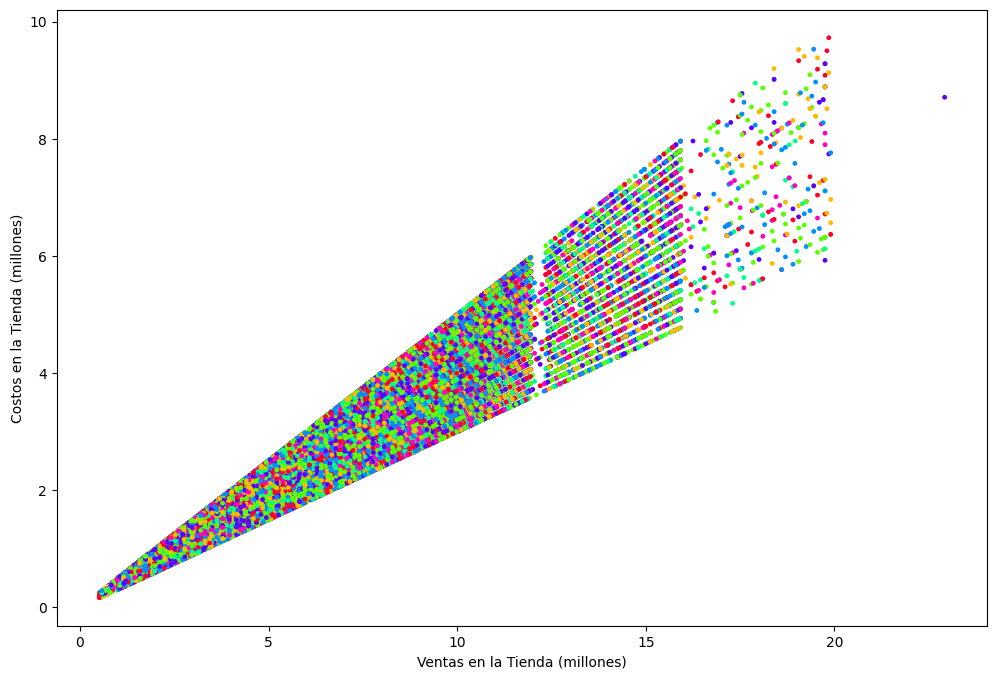

In [ ]:
kmeans = KMeans(n_clusters= 7, n_init=10, max_iter= 300)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_

X_std['CLUSTER'] = labels

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(X_std['ventas_tienda_millones'], X_std['costo_tienda_millones'], c=labels, s=6, cmap='gist_rainbow')
plt.xlabel('Ventas en la Tienda (millones)')
plt.ylabel('Costos en la Tienda (millones)')

plt.show

In [ ]:
X_std.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda_millones,costo_tienda_millones,ventas_unitarias_millones,promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos,promedio_autos,ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,CLUSTER
29170,13,15,1,4.74,1.7538,2,24,1,2,2,1,1,0,1,1,0,0,20000,0,73,2.37,12.90,11.80,0,1,13,2,4,2,30268.0,22063.0,4923.0,3282.0,0,0,0,0,0,7,79.95,3
41425,33,15,1,1.94,0.8342,2,26,1,2,1,3,1,2,2,1,2,2,140000,0,74,0.97,8.83,6.82,0,0,6,2,5,3,23598.0,14210.0,5633.0,3755.0,0,0,0,0,1,10,135.92,6
8024,7,6,1,4.74,2.2752,3,7,2,1,1,1,2,2,2,1,2,2,60000,1,26,1.58,10.30,8.30,1,0,7,2,9,4,34791.0,26354.0,5062.0,3375.0,0,0,1,1,0,10,77.72,2
53756,5,1,1,13.28,5.4448,4,44,1,1,2,2,2,2,2,1,2,2,60000,1,4,3.32,7.20,6.19,1,0,21,3,6,3,23688.0,15337.0,5011.0,3340.0,1,1,1,1,1,13,53.82,5
13332,14,13,3,11.48,4.1328,4,5,1,2,1,2,2,2,4,1,3,3,60000,0,17,2.87,17.10,15.10,0,0,34,1,1,1,27694.0,18670.0,5415.0,3610.0,1,1,1,1,1,4,66.27,5


#6. Descripción de los clusters

¡Excelente trabajo! Los clusters generados tienen una descripción y ahora es el momento de analizar cada una da las descripciones.

1. Debes **generar en una celda de texto** el resultado consolidado de tu análisis.

In [ ]:
X_std.groupby('CLUSTER').describe()

categoria_alimento                                                    \
                     count       mean        std  min  25%   50%   75%   max   
CLUSTER                                                                        
0                   6719.0  16.018157  11.401139  1.0  7.0  13.0  23.0  45.0   
1                   7184.0  15.847996  11.217355  1.0  7.0  13.0  23.0  45.0   
2                  13249.0  15.878406  11.358319  1.0  7.0  13.0  24.0  45.0   
3                   7255.0  15.697726  11.314660  1.0  7.0  13.0  23.0  45.0   
4                   9552.0  15.860762  11.394961  1.0  7.0  13.0  23.0  45.0   
5                  10769.0  15.667471  11.314588  1.0  7.0  13.0  23.0  45.0   
6                   5700.0  15.683509  11.364258  1.0  6.0  13.0  23.0  45.0   

        departamento                                                    tipo  \
               count      mean       std  min  25%  50%   75%   max    count   
CLUSTER                                                                        
0             6719.0  7.813663  4.980981  1.0  4.0  7.0  11.0  22.0   6719.0   
1             7184.0  7.856487  4.921025  1.0  4.0  7.0  11.0  22.0   7184.0   
2            13249.0  7.889048  4.966106  1.0  4.0  7.0  11.0  22.0  13249.0   
3             7255.0  7.842867  5.033344  1.0  4.0  7.0  11.0  22.0   7255.0   
4             9552.0  7.743928  4.951483  1.0  4.0  7.0  11.0  22.0   9552.0   
5            10769.0  7.776488  4.931562  1.0  4.0  7.0  11.0  22.0  10769.0   
6             5700.0  7.758070  5.006845  1.0  4.0  7.0  11.0  22.0   5700.0   

                                                     ventas_tienda_millones  \
             mean       std  min  25%  50%  75%  max                  count   
CLUSTER                                                                       
0        1.382497  0.648926  1.0  1.0  1.0  2.0  3.0                 6719.0   
1        1.379872  0.651873  1.0  1.0  1.0  2.0  3.0                 7184.0   
2        1.384784  0.655383  1.0  1.0  1.0  2.0  3.0                13249.0   
3        1.364438  0.639697  1.0  1.0  1.0  2.0  3.0                 7255.0   
4        1.384213  0.653906  1.0  1.0  1.0  2.0  3.0                 9552.0   
5        1.364751  0.637724  1.0  1.0  1.0  2.0  3.0                10769.0   
6        1.364211  0.636645  1.0  1.0  1.0  2.0  3.0                 5700.0   

                                                              \
             mean       std   min     25%   50%   75%    max   
CLUSTER                                                        
0        6.534888  3.442566  0.51  3.8600  5.91  8.64  19.90   
1        6.535227  3.575841  0.51  3.6800  5.86  8.72  19.90   
2        6.577622  3.464084  0.52  3.8400  6.00  8.70  19.90   
3        6.519322  3.377506  0.52  3.9000  5.97  8.56  19.75   
4        6.619889  3.488748  0.58  3.8700  6.16  8.73  19.90   
5        6.417448  3.390633  0.53  3.7200  5.82  8.52  22.92   
6        6.599498  3.534297  0.65  3.7575  5.97  8.79  19.75   

        costo_tienda_millones                                                \
                        count      mean       std     min       25%     50%   
CLUSTER                                                                       
0                      6719.0  2.616995  1.442993  0.1632  1.528200  2.3730   
1                      7184.0  2.624038  1.505865  0.1792  1.448850  2.3524   
2                     13249.0  2.632508  1.449975  0.1953  1.518000  2.4054   
3                      7255.0  2.615060  1.422929  0.1705  1.543900  2.3976   
4                      9552.0  2.655329  1.466884  0.2496  1.522425  2.4207   
5                     10769.0  2.567445  1.424065  0.2014  1.459200  2.3312   
6                      5700.0  2.630025  1.470617  0.2130  1.472450  2.3936   

                          ventas_unitarias_millones                           \
              75%     max                     count      mean       std  min   
CLUSTER                

In [ ]:
kmeans.cluster_centers_

array([[1.58172551e-04, 7.70610374e-05, 1.36417593e-05, 6.45507355e-05,
        2.58528667e-05, 3.06112298e-05, 2.17936780e-04, 1.42799056e-05,
        1.45706441e-05, 1.48761729e-05, 2.47279928e-05, 2.51345298e-05,
        1.92079447e-05, 2.57618566e-05, 6.50597769e-06, 2.45573027e-05,
        2.45573027e-05, 9.46414710e-01, 8.20276496e-06, 3.62242011e-04,
        2.08851188e-05, 1.37149966e-04, 1.17157000e-04, 5.56229603e-06,
        3.42067942e-06, 1.84114933e-04, 1.99699121e-05, 8.02081105e-05,
        3.70242828e-05, 2.60753896e-01, 1.78297171e-01, 4.94741924e-02,
        3.29821717e-02, 6.15620185e-06, 3.47674384e-06, 5.43257687e-06,
        5.43257687e-06, 5.55080838e-06, 6.49688528e-05, 9.88580818e-04],
       [4.20509951e-04, 2.08652418e-04, 3.65626499e-05, 1.72918244e-04,
        6.93850592e-05, 8.18787351e-05, 5.98210905e-04, 3.62993429e-05,
        4.03153359e-05, 4.00265388e-05, 6.70528891e-05, 3.60602076e-05,
        1.00177674e-05, 5.47391664e-05, 1.54235134e-05, 3.22129

In [ ]:
X_std.drop(columns='CLUSTER', inplace=True)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_std.columns)
round(centroids.var(),3).sort_values(ascending=False)

pies_cuadrados_tienda         0.041
ingreso_anual                 0.038
pies_cuadrados_comestibles    0.019
pies_cuadrados_carne          0.001
pies_cuadrados_congelados     0.001
empaque_reciclable            0.000
bajo_en_grasa                 0.000
unidades_por_caja             0.000
comercio                      0.000
ciudad                        0.000
estado                        0.000
categoria_alimento            0.000
peso_bruto                    0.000
cafeteria                     0.000
tienda_de_videos              0.000
barra_de_ensaladas            0.000
comida_preparada              0.000
floristeria                   0.000
divulgacion                   0.000
peso_neto                     0.000
precio_recomendado            0.000
departamento                  0.000
genero                        0.000
tipo                          0.000
ventas_tienda_millones        0.000
costo_tienda_millones         0.000
ventas_unitarias_millones     0.000
promocion                   

In [ ]:
X_std['CLUSTER']=labels
X_std.groupby('CLUSTER')['miembro','comercio','promocion',
                                          'ocupacion','escolaridad','estado_civil',
                                          'genero','total_de_hijos','ingreso_anual',
                                          'costo'].describe()

<ipython-input-37-98d8a544ebde>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  X_std.groupby('CLUSTER')['miembro','comercio','promocion',


miembro                                              comercio  \
           count      mean       std  min  25%  50%  75%  max    count   
CLUSTER                                                                  
0         6719.0  1.929751  0.653026  0.0  2.0  2.0  2.0  3.0   6719.0   
1         7184.0  0.543012  0.965124  0.0  0.0  0.0  1.0  3.0   7184.0   
2        13249.0  1.942939  0.661373  0.0  2.0  2.0  2.0  3.0  13249.0   
3         7255.0  0.170503  0.602138  0.0  0.0  0.0  0.0  3.0   7255.0   
4         9552.0  2.021880  0.615000  0.0  2.0  2.0  2.0  3.0   9552.0   
5        10769.0  1.974928  0.592112  0.0  2.0  2.0  2.0  3.0  10769.0   
6         5700.0  1.939123  0.750724  0.0  2.0  2.0  2.0  3.0   5700.0   

                                                     promocion             \
             mean       std  min  25%  50%  75%  max     count       mean   
CLUSTER                                                                     
0        1.999107  0.995972  1.0  1.0  2.0  2.0  5.0    6719.0  22.140944   
1        2.314727  0.872284  1.0  2.0  2.0  3.0  5.0    7184.0  22.942650   
2        2.076685  0.919630  1.0  2.0  2.0  2.0  5.0   13249.0  22.672504   
3        1.719779  1.162157  1.0  1.0  1.0  2.0  5.0    7255.0  21.648105   
4        1.625523  1.140598  1.0  1.0  1.0  2.0  5.0    9552.0  20.793446   
5        1.887269  1.005886  1.0  1.0  2.0  2.0  5.0   10769.0  20.129817   
6        1.913333  0.780665  1.0  1.0  2.0  2.0  5.0    5700.0  21.124912   

                                                ocupacion                      \
               std  min   25%   50%   75%   max     count      mean       std   
CLUSTER                                                                         
0        12.753622  1.0  11.0  21.0  33.0  48.0    6719.0  2.611401  0.921475   
1        12.740289  1.0  12.0  22.0  33.0  48.0    7184.0  2.075306  1.082190   
2        12.701308  1.0  12.0  22.0  33.0  48.0   13249.0  2.292022  1.104488   
3        13.417428  1.0  10.0  22.0  34.0  48.0    7255.0  1.904618  1.009603   
4        13.066999  1.0   9.0  22.0  31.0  46.0    9552.0  2.171587  1.145282   
5        13.184394  1.0   8.0  18.0  31.0  48.0   10769.0  2.617606  0.988572   
6        13.236501  1.0  10.0  21.0  31.0  48.0    5700.0  2.594737  0.914280   

                                 escolaridad                                \
         min  25%  50%  75%  max       count      mean       std  min  25%   
CLUSTER                                                                      
0        2.0  2.0  2.0  4.0  4.0      6719.0  2.561095  1.089796  1.0  2.0   
1        1.0  1.0  2.0  3.0  5.0      7184.0  1.526448  1.037845  1.0  1.0   
2        1.0  1.0  2.0  3.0  5.0     13249.0  2.775153  1.090458  1.0  2.0   
3        1.0  1.0  1.0  3.0  5.0      7255.0  1.139904  0.511381  1.0  1.0   
4        1.0  1.0  2.0  3.0  5.0      9552.0  3.044075  1.164172  1.0  3.0   
5        1.0  2.0  2.0  4.0  5.0     10769.0  2.353329  0.964574  1.0  2.0   
6        2.0  2.0  2.0  4.0  4.0      5700.0  2.620175  1.236024  1.0  2.0   

                       estado_civil                                          \
         50%  75%  max        count      mean       std  min  25%  50%  75%   
CLUSTER                                                                       
0        2.0  3.0  5.0       6719.0  1.470606  0.499172  1.0  1.0  1.0  2.0   
1        1.0  1.0  5.0       7184.0  1.522829  0.499513  1.0  1.0  2.0  2.0   
2        3.0  3.0  5.0      13249.0  1.502000  0.500015  1.0  1.0  2.0  2.0   
3        1.0  1.0  5.0       7255.0  1.493039  0.499986  1.0  1.0  1.0  2.0   
4        3.0  3.0  5.0       9552.0  1.502827  0.500018  1.0  1.0  2.0  2.0   
5        2.0  2.0  5.0      10769.0  1.524933  0.499401  1.0  1.0  2.0  2.0   
6        3.0  3.0  5.0       5700.0  1.482982  0.499754  1.0  1.0  1.0  2.0   

               genero                                               \
         max    count      mean       std  m

##Posibles estrategias a implementar

2. Aquí vas a elaborar una serie de recomendaciones de estrategias para personalizar la experiencia de los clientes en cada uno de los clusters; por ejemplo:

En el cluster A, se encuentran reunidos los clientes que gastan más dinero en productos de bebida.

*Estrategia sugerida: Elaborar una campaña dirigida a estos clientes para que también compren productos de comida(…)*

Aquí puedes usar toda tu creatividad, y la idea es proponer acciones para los clientes según sus características de consumo.

**Miembro:** Como los Supermarket clasifica a sus clientes
```
  {
  'No afiliado': 0,
  'Plata': 1,
  'Bronce': 2,
  'Oro': 3
  }
```

**Comercio:** Los Supermarket se clasifican dependiendo de su ubicación en valor adquisito referente a sus clientes
```
  {
    'Supermercado de lujo':1,
    'Supermercado':2,
    'Supermercado gourmet':3,
    'Pequeño supermercado':4,
    'Supermercado mediano':5
  }
```

**Promocion:** Esta Categoria los Supermarket genera insentivos a los clientes para generar mayores compras en ciertos productos
```
  {
    'Bolsas llenas':1,
    'Lotería de la caja registradora':2,
    'Ahorro para apostadores grandes':3,
    'Venta Doble':4,
    'Días de luz verde':5,
    'Ahorro Enorme':6,
    'Ahorro de precios':7,
    'Rebajadores de precios':8,
    'Días de dólar':9,
    'Venta de dos días':10,
    'Super Ahorradores':11,
    'Descuento de fin de semana':12,'Recortadores de dólares':13,
    'Promociones por montones':14,
    'Gran promoción':15,
    'Gratis para todos':16,
    'Ahorros por montones':17,
    'Ahorro de precios imbatible':18,
    'Aplastadores de precios':19,
    'Días de liquidación de estanterías':20,
    'Días de venta':21,
    'Adelante':22,
    'Super Ahorro':23,
    'Ahorradores de billetera':24,
    'Venta Ahorra Ya':25,
    'Destructores de precios':26,
    'Dos por uno':27,
    'Descuentos de gran magnitud':28,
    'Estantes vacíos':29,
    'Adiós bebé':30,
    'Venta de un día':31,
    'Descuentos fantásticos':32,
    'Días de ahorro':33,
    'Ganadores de ventas':34,
    'Espectacular de cupones':35,
    'Tres por uno':36,
    'Ganadores de precios':37,
    'Más barato':38,
    'Venta No Puedo Creerlo':39,
    'Ahorradores de dinero':40,
    'Especial luz verde':41,
    'Rebajando precios':42,
    'Ahorro de primera clase':43,
    'Mejores ahorros':44,
    'Elige tus ahorros':45,
    'Duplica tus ahorros':46,
    'Venta misteriosa':47,
    'Super ahorradores de billetera':48
    }
```

**Ocupacion:** Trabajo remunerado o no remunerado que tiene el Cliente
```
  {
    'Técnico':1,
    'Profesional':2,
    'Obrero':3,
    'Gestión':4,
    'Cargo de Oficina':5
  }
```
**Escolaridad:** Profesion o nivel de estudio del Cliente
```
  {
    'Primaria':1,
    'Superior':2,
    'Secundaria':3,
    'Maestría':4,
    'Técnico':5
  }
```
**Estado_civil:** Nivel que comparte con otro persona o con ninguna
```
  {
    'Casado':1,
    'Soltero':2
  }
```
**Genero:** Clasificacion fisica del Cliente
```
  {
    'Femenino':1,
    'Masculino':2
  }
```
**Total_de_hijos:** Integrantes de niños ó niñas que tiene a cargo el cliente

**Ingreso_anual:** Dinero ganado del cliente por prestar su tiempo y espacio a una empresa, ó negocio propio

**Costo:** Gasto que tiene ó tubo el cliente en el Supermarket

In [ ]:
description = round(X_std.groupby('CLUSTER', as_index=False)['miembro','comercio','promocion',
                                          'ocupacion','escolaridad','estado_civil',
                                          'genero','total_de_hijos','ingreso_anual',
                                          'costo'].mean(),2)

description['N.CUSTOMERS'] = X_std.CLUSTER.value_counts()

description

<ipython-input-38-8510fd11d7d1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = round(X_std.groupby('CLUSTER', as_index=False)['miembro','comercio','promocion',


,CLUSTER,miembro,comercio,promocion,ocupacion,escolaridad,estado_civil,genero,total_de_hijos,ingreso_anual,costo,N.CUSTOMERS
0,0,1.93,2.00,22.14,2.61,2.56,1.47,1.51,2.49,100202.41,99.79,6719
1,1,0.54,2.31,22.94,2.08,1.53,1.52,1.51,2.53,24120.27,102.54,7184
2,2,1.94,2.08,22.67,2.29,2.78,1.50,1.47,2.58,47836.06,102.29,13249
3,3,0.17,1.72,21.65,1.90,1.14,1.49,1.46,2.39,20000.00,96.57,7255
4,4,2.02,1.63,20.79,2.17,3.04,1.50,1.51,2.71,40117.25,95.49,9552
5,5,1.97,1.89,20.13,2.62,2.35,1.52,1.48,2.43,69623.92,98.34,10769
6,6,1.94,1.91,21.12,2.59,2.62,1.48,1.49,2.56,134263.16,98.97,5700


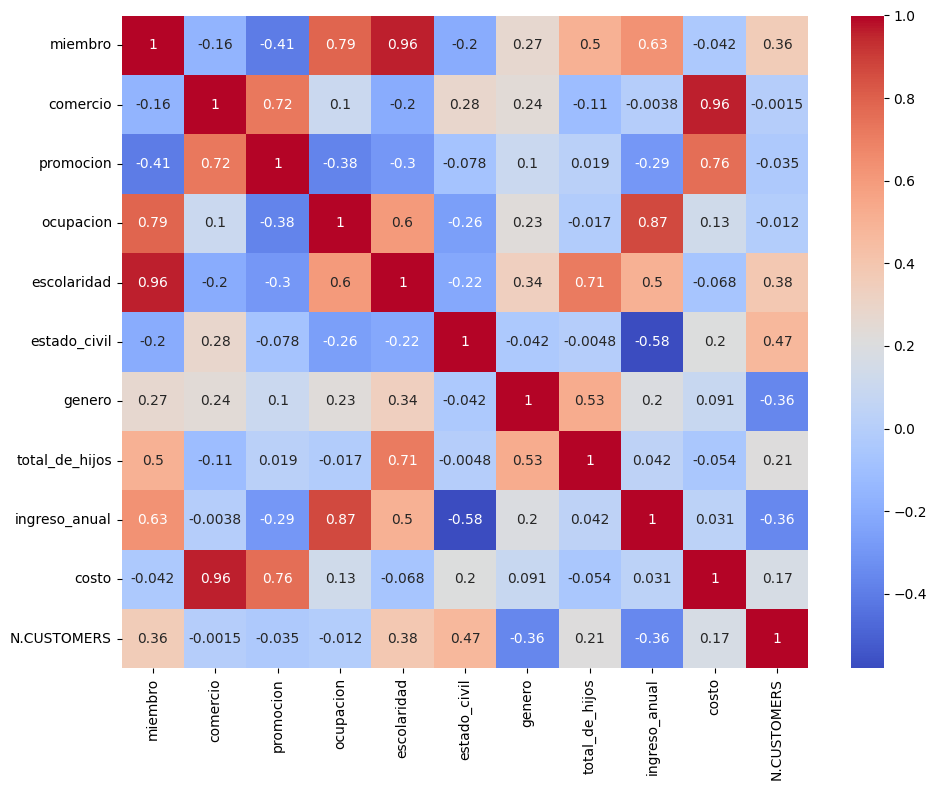

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = description.set_index('CLUSTER')

# Usar los nombres de las columnas del df
corr_matrix = description[['miembro','comercio','promocion','ocupacion','escolaridad',
                           'estado_civil','genero','total_de_hijos','ingreso_anual',
                           'costo','N.CUSTOMERS']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.tight_layout()
plt.show()

In [ ]:
# Convertir la matriz de correlación en un dataframe
correlation_df = pd.DataFrame(corr_matrix.unstack().sort_values(ascending=False), columns=['Correlación'])
correlation_df = correlation_df.reset_index()
correlation_df.columns = ['Columna 1', 'Columna 2', 'Correlación']

# Imprimir el dataframe de correlación
print(correlation_df)

          Columna 1       Columna 2  Correlación
0           miembro         miembro     1.000000
1          comercio        comercio     1.000000
2             costo           costo     1.000000
3     ingreso_anual   ingreso_anual     1.000000
4    total_de_hijos  total_de_hijos     1.000000
5            genero          genero     1.000000
6       escolaridad     escolaridad     1.000000
7         ocupacion       ocupacion     1.000000
8         promocion       promocion     1.000000
9      estado_civil    estado_civil     1.000000
10      N.CUSTOMERS     N.CUSTOMERS     1.000000
11            costo        comercio     0.962213
12         comercio           costo     0.962213
13          miembro     escolaridad     0.957956
14      escolaridad         miembro     0.957956
15        ocupacion   ingreso_anual     0.865165
16    ingreso_anual       ocupacion     0.865165
17        ocupacion         miembro     0.786562
18          miembro       ocupacion     0.786562
19            costo 

CLUSTER 0:
```
{
  miembro:No esta afiliado
  comercio:Nucleo de compras principal es el Supermarket
  promocion:Le llama mas la atención el día de Super Ahorro
  ocupacion: Este grupo tiene un cargo mas Profesional
  escolaridad: un mayor porcentaje solo tienen primaria aunque algunos son Profesionales
  estado_civil: Personas Casadas
  genero: Este grupo tiene un alto número de mujeres
  total_de_hijos: un promedio de 2 hijos
  ingreso_anual: su poder adquisitivo es uno de los bajos
  costo:sus gastos tiene una tendencia alta
  N.CUSTOMERS:Número de clientes bajo
}
```
CLUSTER 1:
```
{
  miembro:Plata, con derechos de algunos productos con descuento
  comercio:Nucleo de compras principal es el Supermarket
  promocion:Le llama mas la atención los Días de liquidación de estanterías
  ocupacion: Este grupo tiene un cargo mas Obrero
  escolaridad: un porcentaje promedio graduados en Superior
  estado_civil: Personas Casadas
  genero: Este grupo tiene un alto número de mujeres
  total_de_hijos: un promedio de 2 hijos
  ingreso_anual: su poder adquisitivo es promedio
  costo:sus gastos tiene una tendencia promedia
  N.CUSTOMERS:Número de clientes alto
}
```
CLUSTER 2:
```
{
  miembro:Plata, con derechos de algunos productos con descuento
  comercio:Nucleo de compras principal es el Supermarket
  promocion:Le llama mas la atención los Días de Adelanto
  ocupacion: Este grupo tiene un cargo mas Obrero
  escolaridad: un porcentaje alto en graduados de Secundaria
  estado_civil: Personas Casadas
  genero: Este grupo tiene un alto número de mujeres
  total_de_hijos: un promedio de 2 hijos
  ingreso_anual: su poder adquisitivo esta en un grado alto
  costo:sus gastos tiene una tendencia promedia
  N.CUSTOMERS:Número de clientes bajo
}
```
CLUSTER 3:
```
{
  miembro:Plata, con derechos de algunos productos con descuento
  comercio:Nucleo de compras principal es el Supermarket
  promocion:Le llama mas la atención el día de Super Ahorro
  ocupacion: Este grupo tiene un cargo mas Profesional
  escolaridad: un porcentaje alto en graduados de Secundaria
  estado_civil: Personas Casadas
  genero: Este grupo tiene un alto número de mujeres
  total_de_hijos: un promedio de 3 hijos
  ingreso_anual: su poder adquisitivo es basico
  costo:sus gastos tiene una tendencia alta
  N.CUSTOMERS:Número de clientes alto
}
```
CLUSTER 4:
```
{
  miembro:Plata, con derechos de algunos productos con descuento
  comercio:Nucleo de compras principal es el Supermarket
  promocion:Le llama mas la atención los Días de venta
  ocupacion: Este grupo tiene un cargo mas Profesional
  escolaridad: un porcentaje alto en graduados de Secundaria
  estado_civil: Personas Casadas
  genero: Este grupo tiene un alto número de mujeres
  total_de_hijos: un promedio de 3 hijos
  ingreso_anual: su poder adquisitivo es basico
  costo:sus gastos tiene una tendencia baja
  N.CUSTOMERS:Número de clientes alto
}
```
CLUSTER 5:
```
{
  miembro:Plata, con derechos de algunos
  comercio:Nucleo de compras principal es el Supermarket
  promocion:Le llama mas la atención los Días de Adelanto
  ocupacion: Este grupo tiene un cargo mas Profesional
  escolaridad: un mayor porcentaje solo tienen primaria aunque algunos son Profesionales
  estado_civil: Personas Casadas
  genero: Este grupo tiene un alto número de mujeres
  total_de_hijos: un promedio de 2 hijos
  ingreso_anual: su poder adquisitivo es uno de los bajos
  costo:sus gastos tiene una tendencia baja
  N.CUSTOMERS:Número de clientes bajo
}
```
CLUSTER 6:
```
{
  miembro:No esta afiliado
  comercio:Nucleo de compras principal es el Supermarket
  promocion:Le llama mas la atención los Días de venta
  ocupacion: Este grupo tiene un cargo mas Obrero
  escolaridad: un porcentaje alto en graduados de Secundaria
  estado_civil: Personas Casadas
  genero: Este grupo tiene un alto número de mujeres
  total_de_hijos: un promedio de 3 hijos
  ingreso_anual: su poder adquisitivo es el mas alto
  costo:sus gastos tiene una tendencia promedia
  N.CUSTOMERS:Número de clientes bajo
}
```

#README

In [ ]:
#!pip install nbconvert

In [ ]:
#!jupyter nbconvert --to markdown La_Esencia_del_Cliente.ipynb

[NbConvertApp] Converting notebook La_Esencia_del_Cliente.ipynb to markdown
[NbConvertApp] Support files will be in La_Esencia_del_Cliente_files/
[NbConvertApp] Making directory La_Esencia_del_Cliente_files
[NbConvertApp] Making directory La_Esencia_del_Cliente_files
[NbConvertApp] Making directory La_Esencia_del_Cliente_files
[NbConvertApp] Making directory La_Esencia_del_Cliente_files
[NbConvertApp] Making directory La_Esencia_del_Cliente_files
[NbConvertApp] Making directory La_Esencia_del_Cliente_files
[NbConvertApp] Making directory La_Esencia_del_Cliente_files
[NbConvertApp] Making directory La_Esencia_del_Cliente_files
[NbConvertApp] Making directory La_Esencia_del_Cliente_files
[NbConvertApp] Making directory La_Esencia_del_Cliente_files
[NbConvertApp] Making directory La_Esencia_del_Cliente_files
[NbConvertApp] Writing 250700 bytes to La_Esencia_del_Cliente.md
